<a href="https://colab.research.google.com/github/RoyMukta/Draft/blob/main/Data_Cleaning_and_EDA_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install --upgrade pandas numpy


# Load Data and show Row and column name

In [5]:
import pandas as pd
import numpy as np

import re

# Data file path
file_path = "/content/Mental health social media data.csv"
df = pd.read_csv(file_path)

# Dataset shape and column names
print("Rows and Columns:", df.shape)
print("\nColumn Names:\n", df.columns)

#First few rows of data set
df.head()

Rows and Columns: (28200, 9)

Column Names:
 Index(['Post ID', 'Thread URL', 'Post Title', 'Post Content', 'Post Author',
       'User ID', 'Post Date', 'Post Category', 'Number of Comments'],
      dtype='object')


,Post ID,Thread URL,Post Title,Post Content,Post Author,User ID,Post Date,Post Category,Number of Comments
0,607679,https://forums.beyondblue.org.au/t5/anxiety/hi...,Hi! Check out this post if you're not sure how...,Hi there and welcome to the Anxiety section of...,BeyondBlue,54597,‎04-03-2025,Anxiety,NaN
1,612274,https://forums.beyondblue.org.au/t5/anxiety/ge...,Generalised Anxiety disorder not going good,"Hi, my name is lily. I have no idea what else ...",Lil123,31240,NaN,Anxiety,NaN
2,612354,https://forums.beyondblue.org.au/t5/anxiety/st...,Struggling at the moment,"Hello everyone, this is my first post, so I ho...",Toby,55687,NaN,Anxiety,NaN
3,612290,https://forums.beyondblue.org.au/t5/anxiety/st...,Stalker,I feel no one is supporting me. I have a stalk...,G-i-g-i,55697,NaN,Anxiety,NaN
4,612296,https://forums.beyondblue.org.au/t5/anxiety/ov...,overwhelmed,sorry if this is alot i just rlly need to get ...,Guest_87295139,55698,NaN,Anxiety,NaN


In [6]:
import pandas as pd

# Load dataset
#df = pd.read_csv("Mental health social media data.csv")
#file_path = "/content/Mental health social media data.csv"
file_path = "/content/Mental health social media data.csv"

# Count posts per category
category_counts = df['Post Category'].value_counts().reset_index()

# Rename columns for clarity
category_counts.columns = ['Post Category', 'Number of Posts']

# Add a total row
total_posts = category_counts['Number of Posts'].sum()
category_counts.loc[len(category_counts)] = ['Total', total_posts]


# Show table
print(category_counts)

#Save table to CSV
category_counts.to_csv("posts_per_category.csv", index=False)



                   Post Category  Number of Posts
0   Relationship & Family Issues             7576
1                        Anxiety             7511
2                     Depression             6618
3                  PTSD & Trauma             2062
4                   Staying Well             1772
5  Suicidal Thoughts & Self-harm             1316
6              Suicidal Thoughts             1316
7                 Social Anxiety               29
8                          Total            28200


Here I have merged Suicidal "Thoughts & Self-harm", and "Suicidal Thoughts", also "Anxiety "and "Social Anxiety"

In [8]:
import pandas as pd

# Load dataset
file_path = "/content/Mental health social media data.csv"
df = pd.read_csv(file_path)

# Merge categories:
df['Post Category'] = df['Post Category'].replace({
    'Suicidal Thoughts': 'Suicidal Thoughts & Self-harm',
    'Social Anxiety': 'Anxiety'
})

# Save the full dataset with merged categories
df.to_csv("Mental health social media data_merged.csv", index=False)

# Count posts per category
category_counts = df['Post Category'].value_counts().reset_index()

# Rename columns
category_counts.columns = ['Post Category', 'Number of Posts']

# Add total row
total_posts = category_counts['Number of Posts'].sum()
category_counts.loc[len(category_counts)] = ['Total', total_posts]

# Show table
print(category_counts)

# Save the summary table
category_counts.to_csv("posts_per_category_summary.csv", index=False)



                   Post Category  Number of Posts
0   Relationship & Family Issues             7576
1                        Anxiety             7540
2                     Depression             6618
3  Suicidal Thoughts & Self-harm             2632
4                  PTSD & Trauma             2062
5                   Staying Well             1772
6                          Total            28200


Data set Basic statistics

In [9]:
# Basic statistics
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows (exact match):", df.duplicated().sum())


Data Types:
 Post ID                 int64
Thread URL             object
Post Title             object
Post Content           object
Post Author            object
User ID                 int64
Post Date              object
Post Category          object
Number of Comments    float64
dtype: object

Missing values:
 Post ID                   0
Thread URL             6618
Post Title                0
Post Content              1
Post Author               0
User ID                   0
Post Date               106
Post Category             0
Number of Comments    21582
dtype: int64

Duplicate rows (exact match): 1340


# Drop only exact duplicate posts (same title and content)

In [10]:
# Drop only exact duplicate posts (same title and content)
df = df.drop_duplicates(subset=["Post Title", "Post Content"], keep="first")
print("Shape after removing duplicate posts:", df.shape)
df.head()

Shape after removing duplicate posts: (26849, 9)


,Post ID,Thread URL,Post Title,Post Content,Post Author,User ID,Post Date,Post Category,Number of Comments
0,607679,https://forums.beyondblue.org.au/t5/anxiety/hi...,Hi! Check out this post if you're not sure how...,Hi there and welcome to the Anxiety section of...,BeyondBlue,54597,‎04-03-2025,Anxiety,NaN
1,612274,https://forums.beyondblue.org.au/t5/anxiety/ge...,Generalised Anxiety disorder not going good,"Hi, my name is lily. I have no idea what else ...",Lil123,31240,NaN,Anxiety,NaN
2,612354,https://forums.beyondblue.org.au/t5/anxiety/st...,Struggling at the moment,"Hello everyone, this is my first post, so I ho...",Toby,55687,NaN,Anxiety,NaN
3,612290,https://forums.beyondblue.org.au/t5/anxiety/st...,Stalker,I feel no one is supporting me. I have a stalk...,G-i-g-i,55697,NaN,Anxiety,NaN
4,612296,https://forums.beyondblue.org.au/t5/anxiety/ov...,overwhelmed,sorry if this is alot i just rlly need to get ...,Guest_87295139,55698,NaN,Anxiety,NaN


Number of Comments' column, and Thread URL

In [11]:
# Drop rows where 'Post Date' is missing
df = df.dropna(subset=['Post Date'])
# Drop 'Number of Comments' column, and Thread URL
df = df.drop(columns=["Number of Comments","Thread URL"])
# Optional: Reset index after dropping rows
#df = df.reset_index(drop=True)

# Print shape to confirm rows were dropped
print("Shape after dropping missing Post Date:", df.shape)
df.head()


Shape after dropping missing Post Date: (26749, 7)


,Post ID,Post Title,Post Content,Post Author,User ID,Post Date,Post Category
0,607679,Hi! Check out this post if you're not sure how...,Hi there and welcome to the Anxiety section of...,BeyondBlue,54597,‎04-03-2025,Anxiety
15,180185,I had a car accident,And it was entirely my own fault. I tried cro...,grovi,12724,‎21-05-2016,Anxiety
17,516409,Horrible week,"Hi everyone,\nI'm having a horrible week, so j...",Whatsinaname,7809,‎25-09-2020,Anxiety
18,605332,New relationship anxiety,Dear All\nJust need a connection to feel the s...,Sammy,52665,‎10-01-2025,Anxiety
20,610948,"Persistent, constant anxiety","Hi there,\njust reaching out to anyone who mig...",Beepboop,55341,‎03-06-2025,Anxiety


Remove HTML tag

In [12]:
def remove_html(text):
    if pd.isna(text):
        return ""
    return re.sub(r'<.*?>', '', text)
df["Post Content"] = df["Post Content"].apply(remove_html)
df["Post Title"] = df["Post Title"].apply(remove_html)



# Clean Whitespace, Links, Non-ASCII

In [13]:
def basic_clean(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
df["Post Content"] = df["Post Content"].apply(basic_clean)
df["Post Title"] = df["Post Title"].apply(basic_clean)


Check for Remaining Missing Values and change date time formet

In [14]:
print(df.isnull().sum())
#Convert Post Date to datetime
#df["Post Date"] = pd.to_datetime(df["Post Date"], format="%d-%m-%Y", errors='coerce')


Post ID          0
Post Title       0
Post Content     0
Post Author      0
User ID          0
Post Date        0
Post Category    0
dtype: int64


Save new Mental health social forum final data

In [15]:
# Step 1: Convert to string (if not already)
df["Post Date"] = df["Post Date"].astype(str)

# Step 2: Remove any non-digit or dash characters (e.g., "â€Ž")
df["Post Date"] = df["Post Date"].str.replace(r"[^\d\-]", "", regex=True)

# Step 3: Convert to datetime (format is still day-month-year)
df["Post Date"] = pd.to_datetime(df["Post Date"], format="%d-%m-%Y", errors='coerce')


Drop post Content and post date is missing

In [16]:
df.dropna(subset=["Post Content", "Post Date"], inplace=True)


In [17]:
df.to_csv("Mental health social media data_merged", index=False)
print("Mental health social forum final data saved.")
df.head()


Mental health social forum final data saved.


,Post ID,Post Title,Post Content,Post Author,User ID,Post Date,Post Category
0,607679,hi! check out this post if you're not sure how...,hi there and welcome to the anxiety section of...,BeyondBlue,54597,2025-03-04,Anxiety
15,180185,i had a car accident,and it was entirely my own fault. i tried cros...,grovi,12724,2016-05-21,Anxiety
17,516409,horrible week,"hi everyone, i'm having a horrible week, so ju...",Whatsinaname,7809,2020-09-25,Anxiety
18,605332,new relationship anxiety,dear all just need a connection to feel the su...,Sammy,52665,2025-01-10,Anxiety
20,610948,"persistent, constant anxiety","hi there, just reaching out to anyone who migh...",Beepboop,55341,2025-06-03,Anxiety


In [18]:
# Basic statistics
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows (exact match):", df.duplicated().sum())
print("Shape after dropping missing Post Date:", df.shape)


Data Types:
 Post ID                   int64
Post Title               object
Post Content             object
Post Author              object
User ID                   int64
Post Date        datetime64[ns]
Post Category            object
dtype: object

Missing values:
 Post ID          0
Post Title       0
Post Content     0
Post Author      0
User ID          0
Post Date        0
Post Category    0
dtype: int64

Duplicate rows (exact match): 0
Shape after dropping missing Post Date: (26749, 7)


Remove url, special characters, normalize spaces

Apply GoEmotions on Both Post Title and Post Content

This will drop any row that has at least one missing value.

In [19]:
df.dropna(subset=["Post Content", "Post Date"], inplace=True)


Save and Download Results

In [21]:
import pandas as pd
import re
import string

# Data file load
df = pd.read_csv("Mental health social media data_merged.csv")

# Combine relevant text columns (adjust if needed)
text_columns = ["Post Title", "Post Content"]
for col in text_columns:
    df[col] = df[col].astype(str)

# Function to clean text
def clean_text(text):
    # Fix encoding issues
    text = text.encode('utf-8', 'ignore').decode('utf-8', 'ignore')

    # Remove unwanted characters (mojibake like â€™, Â, etc.)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning to your columns
for col in text_columns:
    df[col] = df[col].apply(clean_text)

# Save the cleaned data
df.to_csv("Mental_health_cleaned.csv", index=False)
print("Mental_health_cleaned.csv")
df.head()

#print("✅ Cleaned data saved to Mental_health_cleaned.csv")


Mental_health_cleaned.csv


,Post ID,Thread URL,Post Title,Post Content,Post Author,User ID,Post Date,Post Category,Number of Comments
0,607679,https://forums.beyondblue.org.au/t5/anxiety/hi...,Hi Check out this post if youre not sure how t...,Hi there and welcome to the Anxiety section of...,BeyondBlue,54597,‎04-03-2025,Anxiety,NaN
1,612274,https://forums.beyondblue.org.au/t5/anxiety/ge...,Generalised Anxiety disorder not going good,Hi my name is lily I have no idea what else to...,Lil123,31240,NaN,Anxiety,NaN
2,612354,https://forums.beyondblue.org.au/t5/anxiety/st...,Struggling at the moment,Hello everyone this is my first post so I hope...,Toby,55687,NaN,Anxiety,NaN
3,612290,https://forums.beyondblue.org.au/t5/anxiety/st...,Stalker,I feel no one is supporting me I have a stalke...,G-i-g-i,55697,NaN,Anxiety,NaN
4,612296,https://forums.beyondblue.org.au/t5/anxiety/ov...,overwhelmed,sorry if this is alot i just rlly need to get ...,Guest_87295139,55698,NaN,Anxiety,NaN


## EDA

# Total number of Unique user


In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mental_health_cleaned.csv")

# Find number of unique users
unique_users = df["User ID"].nunique()

print(f"Total number of unique users: {unique_users}")


Total number of unique users: 18774


In [24]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mental_health_cleaned.csv")

# Total number of cleaned data (rows)
total_rows = len(df)

# Number of unique users
unique_users = df["User ID"].nunique()

print(f"✅ Total number of cleaned posts: {total_rows}")
print(f"✅ Total number of unique users: {unique_users}")


✅ Total number of cleaned posts: 28200
✅ Total number of unique users: 18774


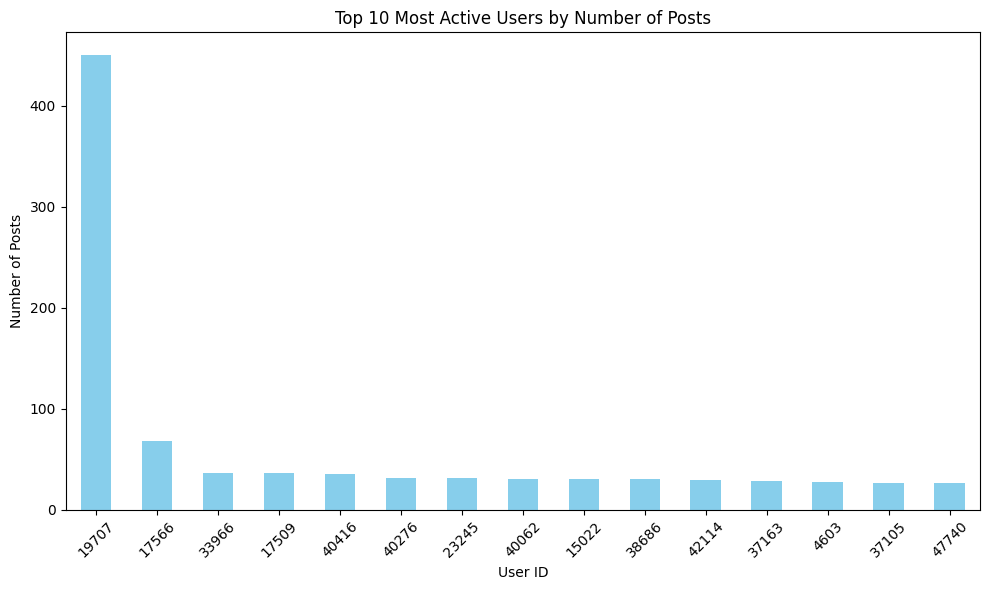

In [25]:
import matplotlib.pyplot as plt
 #Count number of posts per user
user_post_counts = df["User ID"].value_counts().head(15)  # Top 10 users

# Plot
plt.figure(figsize=(10, 6))
user_post_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Active Users by Number of Posts")
plt.xlabel("User ID")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Mental_health_cleaned.csv")

# Count number of posts per user
post_count_per_user = df["User ID"].value_counts()

# Display the result
print(post_count_per_user)


User ID
19707    450
17566     68
33966     36
17509     36
40416     35
        ... 
55300      1
55076      1
55287      1
55543      1
55399      1
Name: count, Length: 18774, dtype: int64


In [ ]:
post_count_per_user.to_csv("user_post_counts.csv", header=["Post Count"])


Index(['Post ID', 'Thread URL', 'Post Title', 'Post Content', 'Post Author',
       'User ID', 'Post Date', 'Post Category', 'Number of Comments'],
      dtype='object')


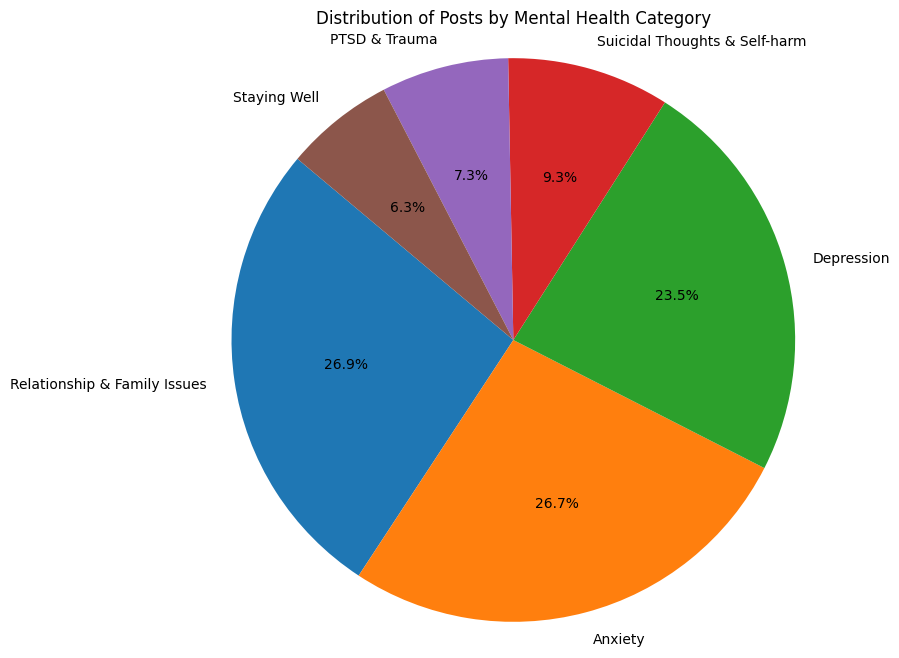

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Mental_health_cleaned.csv")

# Check for column name (adjust if necessary)
print(df.columns)

# Count the number of posts per category
category_counts = df['Post Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Posts by Mental Health Category")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


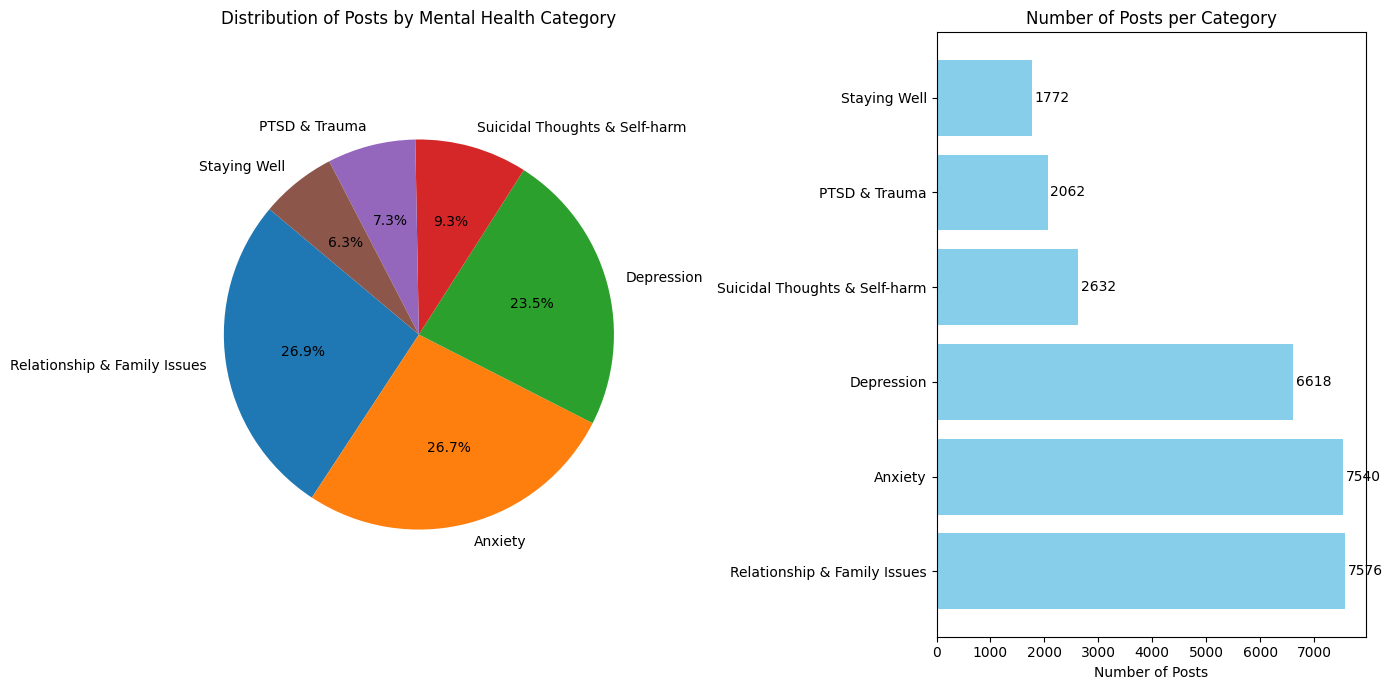

📊 Category-wise data:
Post Category
Relationship & Family Issues     7576
Anxiety                          7540
Depression                       6618
Suicidal Thoughts & Self-harm    2632
PTSD & Trauma                    2062
Staying Well                     1772
Name: count, dtype: int64


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Data file load
df = pd.read_csv("Mental_health_cleaned.csv")

# Count the number of posts per category
category_counts = df['Post Category'].value_counts()

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# --- Pie Chart ---
axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Distribution of Posts by Mental Health Category")
axes[0].axis('equal')

# --- Table/Bar Chart for Counts ---
axes[1].barh(category_counts.index, category_counts.values, color="skyblue")
axes[1].set_title("Number of Posts per Category")
axes[1].set_xlabel("Number of Posts")

# Add counts as labels on bars
for i, v in enumerate(category_counts.values):
    axes[1].text(v + 50, i, str(v), va='center')

plt.tight_layout()
plt.show()

# Also print the raw category counts
print("📊 Category-wise data:")
print(category_counts)


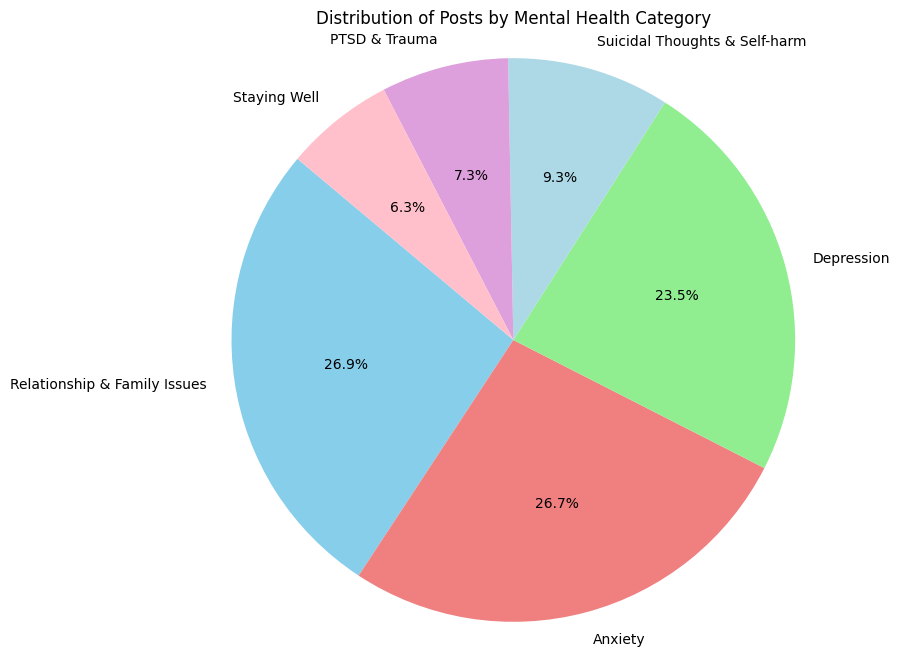

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Mental_health_cleaned.csv")

# Count the number of posts per category
category_counts = df['Post Category'].value_counts()

# Define a list of color names
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'plum', 'pink']

# Plot pie chart with named colors
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors)
plt.title("Distribution of Posts by Mental Health Category")
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()


In [31]:
import pandas as pd

# Load dataset
df = pd.read_csv("Mental_health_cleaned.csv")

# Count posts per category
category_counts = df['Post Category'].value_counts().reset_index()

# Rename columns for clarity
category_counts.columns = ['Post Category', 'Number of Posts']

# Show table
print(category_counts)

# (Optional) Save table to CSV
category_counts.to_csv("posts_per_category.csv", index=False)


                   Post Category  Number of Posts
0   Relationship & Family Issues             7576
1                        Anxiety             7540
2                     Depression             6618
3  Suicidal Thoughts & Self-harm             2632
4                  PTSD & Trauma             2062
5                   Staying Well             1772


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Data file load
df = pd.read_csv("posts_per_category.csv")

# Ensure Post Date is in datetime format
df['Post Date'] = pd.to_datetime(df['Post Date'], errors='coerce')

# Drop rows where date conversion failed
df = df.dropna(subset=['Post Date'])

# Extract year from Post Date
df['Year'] = df['Post Date'].dt.year

# Count number of posts per year
yearly_counts = df['Year'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index.astype(str), yearly_counts.values, color='skyblue')
plt.title("Number of Posts Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Post Date'

Delete 2011 year data

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Mental health social forum final data.csv")

# Convert Post Date column to datetime format
df["Post Date"] = pd.to_datetime(df["Post Date"], errors="coerce")

# Remove rows where the year is 2011
df = df[df["Post Date"].dt.year != 2011]

# Save cleaned dataset if needed
df.to_csv("Mental health social forum cleaned.csv", index=False)

print("Rows with year 2011 removed. New shape:", df.shape)


Rows with year 2011 removed. New shape: (26748, 7)


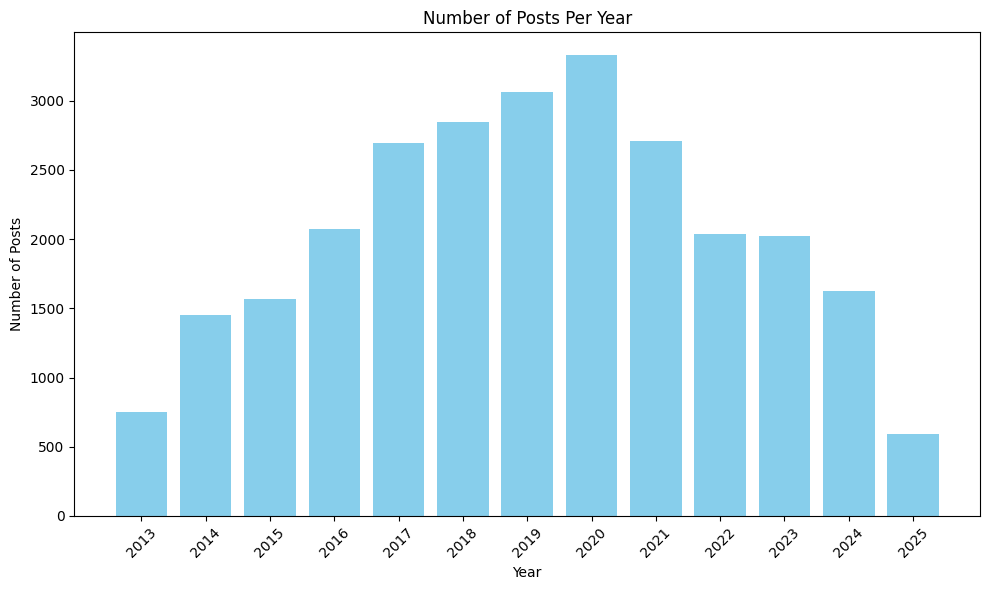

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# # Data file load
df = pd.read_csv("/content/Mental health social forum cleaned.csv")

# Post Date is in datetime format
df['Post Date'] = pd.to_datetime(df['Post Date'], errors='coerce')

# Drop rows where date conversion failed
df = df.dropna(subset=['Post Date'])

# Extract year from Post Date
df['Year'] = df['Post Date'].dt.year

# Count number of posts per year
yearly_counts = df['Year'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index.astype(str), yearly_counts.values, color='skyblue')
plt.title("Number of Posts Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Year wise post

In [ ]:
import pandas as pd

# Data file load
df = pd.read_csv("/content/Mental health social forum cleaned.csv")

# Convert 'Post Date' to datetime format
df['Post Date'] = pd.to_datetime(df['Post Date'], errors='coerce')

# Drop rows with missing or invalid dates
df = df.dropna(subset=['Post Date'])

# Extract year from date
df['Year'] = df['Post Date'].dt.year

# Count number of posts per year
yearly_post_counts = df['Year'].value_counts().sort_index().reset_index()
yearly_post_counts.columns = ['Year', 'Post_Count']

# Save to CSV
yearly_post_counts.to_csv("year_wise_post_count.csv", index=False)

# Show result
print(yearly_post_counts)


    Year  Post_Count
0   2013         748
1   2014        1453
2   2015        1566
3   2016        2072
4   2017        2692
5   2018        2848
6   2019        3060
7   2020        3328
8   2021        2708
9   2022        2039
10  2023        2021
11  2024        1623
12  2025         590


In [ ]:
import pandas as pd

# Load dataset
#df = pd.read_csv("Mental health social forum final data.csv")
df = pd.read_csv("/content/Mental health social forum cleaned.csv")

# Count posts per category
category_counts = df['Post Category'].value_counts().reset_index()

# Rename columns for clarity
category_counts.columns = ['Post Category', 'Number of Posts']

# Show table
print(category_counts)

# (Optional) Save table to CSV
category_counts.to_csv("posts_per_category.csv", index=False)


                   Post Category  Number of Posts
0   Relationship & Family Issues             7537
1                        Anxiety             7489
2                     Depression             6595
3                  PTSD & Trauma             2055
4                   Staying Well             1761
5  Suicidal Thoughts & Self-harm             1311


In [ ]:
import pandas as pd
# Data file load
df = pd.read_csv("/content/Mental health social forum cleaned.csv")

# Convert 'Post Date' to datetime
df['Post Date'] = pd.to_datetime(df['Post Date'], errors='coerce')

# Drop rows with missing or invalid dates or categories
df = df.dropna(subset=['Post Date', 'Post Category'])

# Extract year
df['Year'] = df['Post Date'].dt.year

# Group by category and year, count number of posts
category_year_counts = df.groupby(['Post Category', 'Year']).size().reset_index(name='Post_Count')

# Save to CSV
category_year_counts.to_csv("category_year_wise_post_count.csv", index=False)

# Display result
print(category_year_counts)


                    Post Category  Year  Post_Count
0                         Anxiety  2013         217
1                         Anxiety  2014         423
2                         Anxiety  2015         463
3                         Anxiety  2016         505
4                         Anxiety  2017         762
..                            ...   ...         ...
72  Suicidal Thoughts & Self-harm  2021         392
73  Suicidal Thoughts & Self-harm  2022         289
74  Suicidal Thoughts & Self-harm  2023         244
75  Suicidal Thoughts & Self-harm  2024         151
76  Suicidal Thoughts & Self-harm  2025          37

[77 rows x 3 columns]


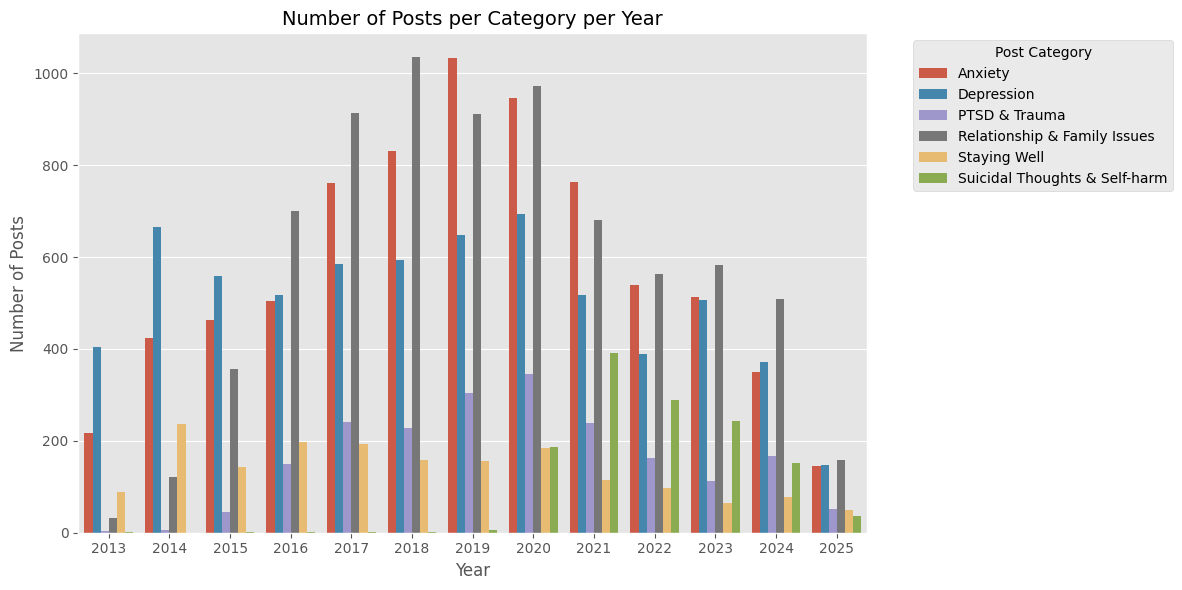

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load grouped category-year post count data
df = pd.read_csv("category_year_wise_post_count.csv")

# Set the plot style
plt.style.use("ggplot")

# Set figure size
plt.figure(figsize=(12, 6))

# Create grouped barplot
sns.barplot(data=df, x="Year", y="Post_Count", hue="Post Category")

# Add labels and title
plt.title("Number of Posts per Category per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.legend(title="Post Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
import os
import nltk

# Download stopwords if not already done
nltk.download('stopwords')

# Data file load
df = pd.read_csv("Mental health social forum cleaned.csv")
#df=/content/Mental health social forum cleaned.csv

# Convert to string
df["Post Content"] = df["Post Content"].astype(str)
df["Post Category"] = df["Post Category"].astype(str)

# Stopwords set
stop_words = set(stopwords.words('english'))

# Create output directory for word clouds
output_dir = "wordclouds_by_category"
os.makedirs(output_dir, exist_ok=True)

# Generate word clouds
for category in df["Post Category"].unique():
    texts = df[df["Post Category"] == category]["Post Content"].str.cat(sep=" ")
    words = [word.lower() for word in texts.split() if word.isalpha() and word.lower() not in stop_words]
    word_freq = Counter(words)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    wordcloud.to_file(f"{output_dir}/{category}_wordcloud.png")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Wordcount for Anxiety

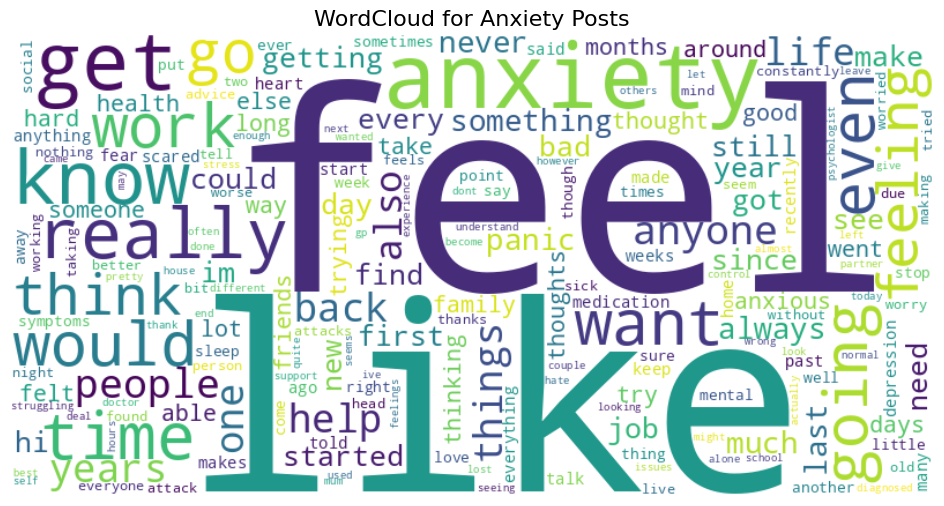

In [ ]:


# Data file load
df = pd.read_csv("Mental health social forum cleaned.csv")

# Replace with the category you want to visualize
target_category = "Anxiety"

# Filter posts for that category
texts = df[df["Post Category"] == target_category]["Post Content"].astype(str).str.cat(sep=" ")

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in texts.split() if word.isalpha() and word.lower() not in stop_words]

# Create word frequency dictionary
word_freq = Counter(words)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"WordCloud for {target_category} Posts", fontsize=16)
plt.show()


# word count for depressin


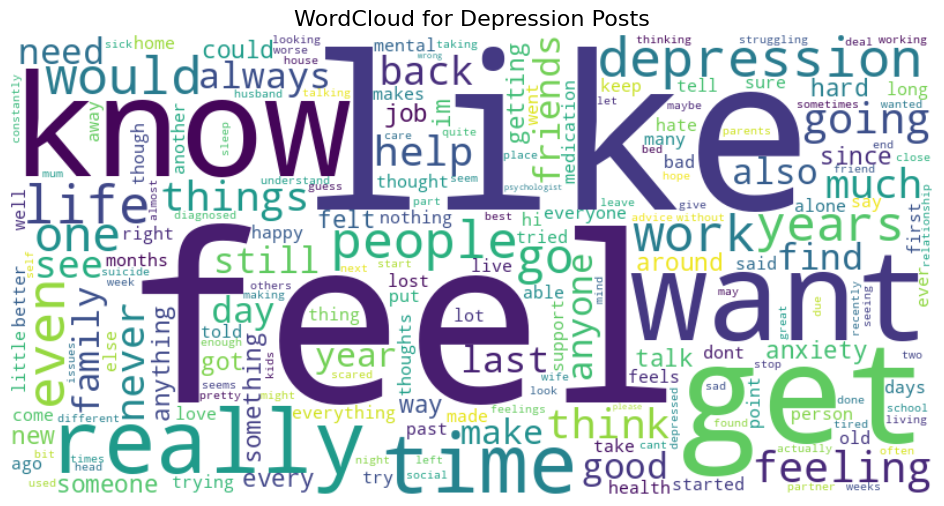

In [ ]:
# Data file load
df = pd.read_csv("Mental health social forum cleaned.csv")

# Replace with the category you want to visualize
target_category = "Depression"

# Filter posts for that category
texts = df[df["Post Category"] == target_category]["Post Content"].astype(str).str.cat(sep=" ")

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in texts.split() if word.isalpha() and word.lower() not in stop_words]

# Create word frequency dictionary
word_freq = Counter(words)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"WordCloud for {target_category} Posts", fontsize=16)
plt.show()


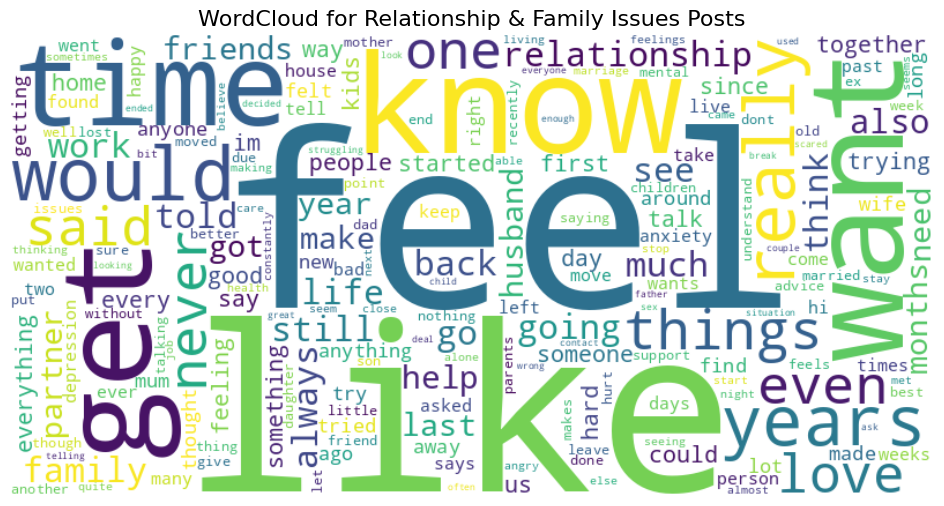

In [ ]:
# Data file load
df = pd.read_csv("Mental health social forum cleaned.csv")

# Replace with the category you want to visualize
target_category = "Relationship & Family Issues"

# Filter posts for that category
texts = df[df["Post Category"] == target_category]["Post Content"].astype(str).str.cat(sep=" ")

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in texts.split() if word.isalpha() and word.lower() not in stop_words]

# Create word frequency dictionary
word_freq = Counter(words)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"WordCloud for {target_category} Posts", fontsize=16)
plt.show()


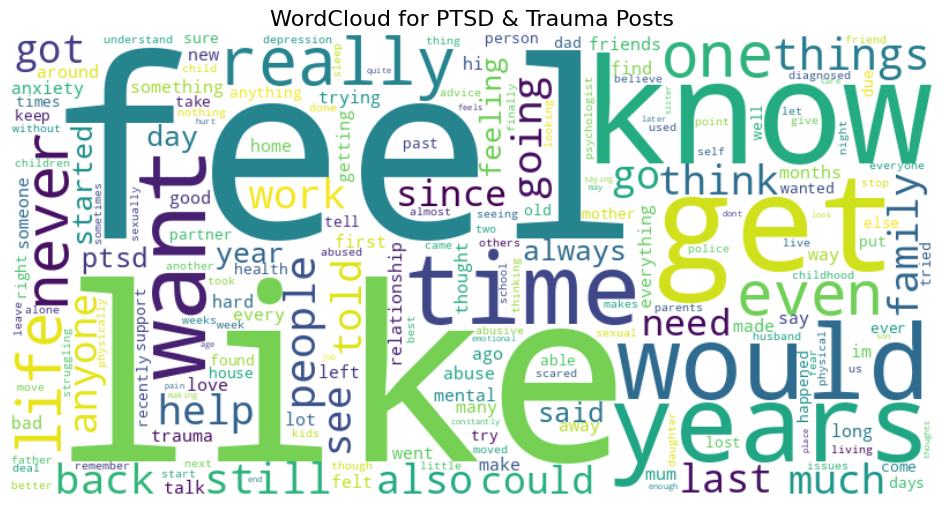

In [ ]:
# Data file load
df = pd.read_csv("Mental health social forum cleaned.csv")

# Replace with the category you want to visualize
target_category = "PTSD & Trauma"

# Filter posts for that category
texts = df[df["Post Category"] == target_category]["Post Content"].astype(str).str.cat(sep=" ")

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in texts.split() if word.isalpha() and word.lower() not in stop_words]

# Create word frequency dictionary
word_freq = Counter(words)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"WordCloud for {target_category} Posts", fontsize=16)
plt.show()


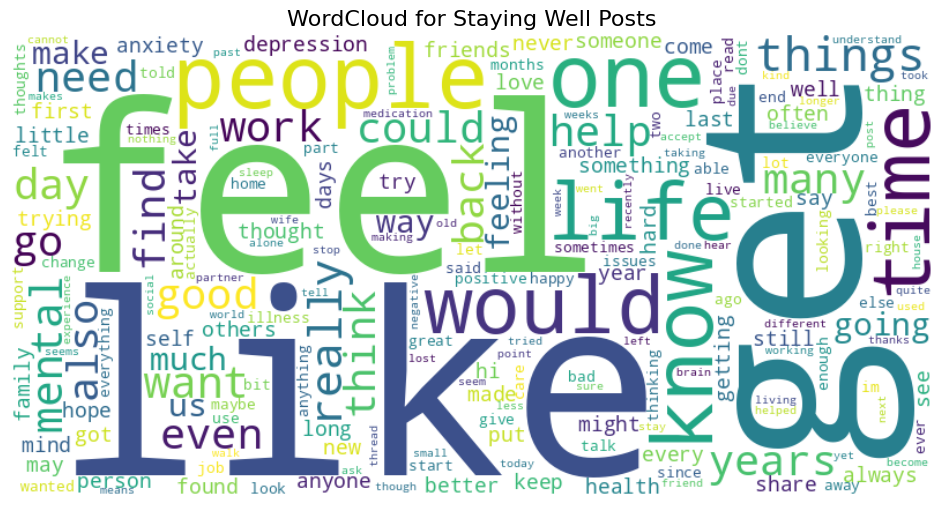

In [ ]:
# Load data
df = pd.read_csv("Mental health social forum cleaned.csv")

# Replace with the category you want to visualize
target_category = "Staying Well"

# Filter posts for that category
texts = df[df["Post Category"] == target_category]["Post Content"].astype(str).str.cat(sep=" ")

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in texts.split() if word.isalpha() and word.lower() not in stop_words]

# Create word frequency dictionary
word_freq = Counter(words)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',  colormap='viridis').generate_from_frequencies(word_freq)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"WordCloud for {target_category} Posts", fontsize=16)
plt.show()

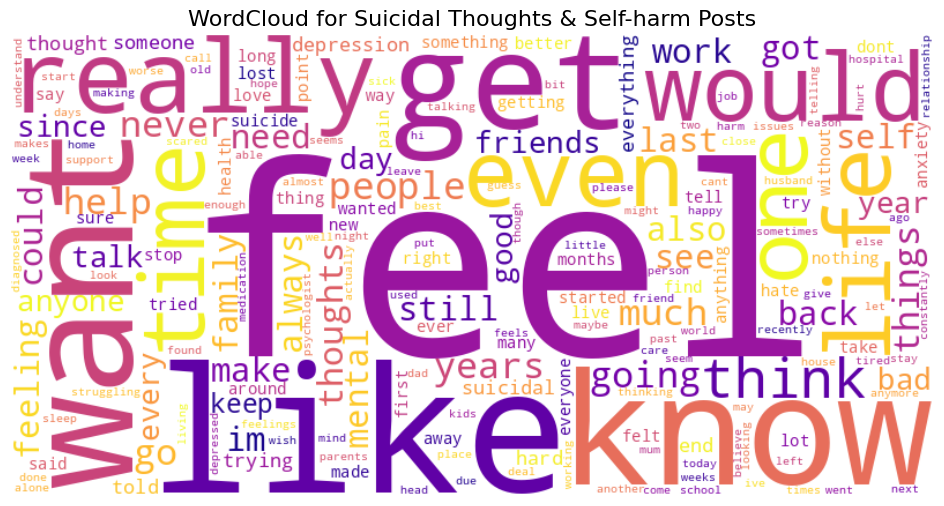

In [ ]:
# Load your data
df = pd.read_csv("Mental health social forum cleaned.csv")

# Replace with the category you want to visualize
target_category = "Suicidal Thoughts & Self-harm"

# Filter posts for that category
texts = df[df["Post Category"] == target_category]["Post Content"].astype(str).str.cat(sep=" ")

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in texts.split() if word.isalpha() and word.lower() not in stop_words]

# Create word frequency dictionary
word_freq = Counter(words)
# Generate WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma'   # <-- Change this to any matplotlib colormap name
).generate_from_frequencies(word_freq)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"WordCloud for {target_category} Posts", fontsize=16)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

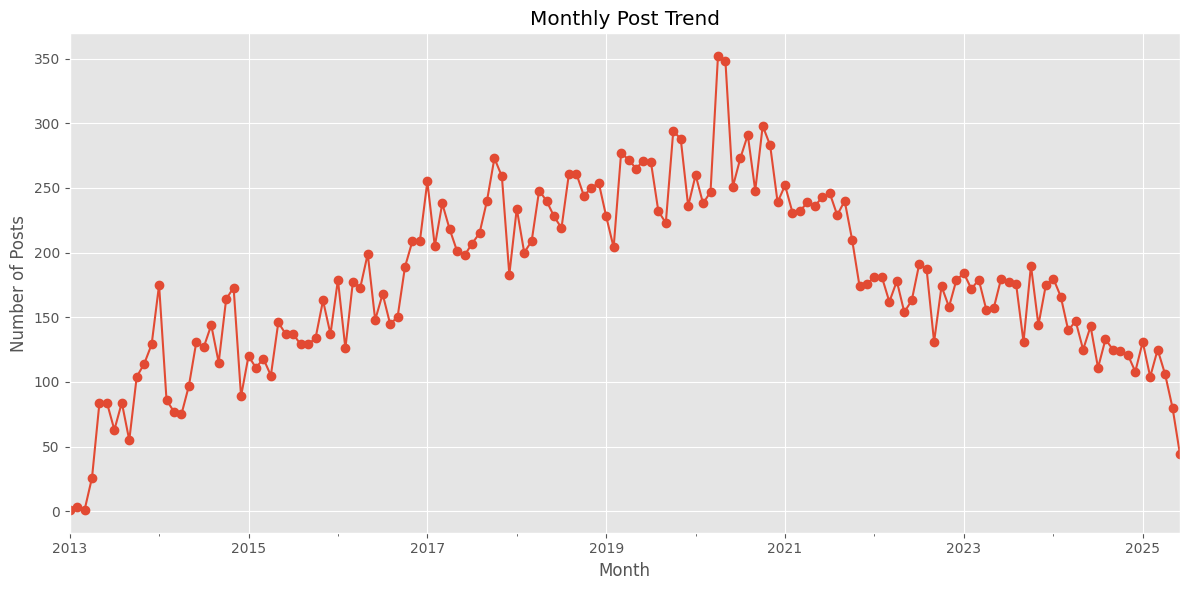

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("Mental health social forum cleaned.csv")

# Ensure 'Post Date' is datetime
df['Post Date'] = pd.to_datetime(df['Post Date'], errors='coerce')

# Group by month
monthly_counts = df['Post Date'].dt.to_period('M').value_counts().sort_index()

# Plot
monthly_counts.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Monthly Post Trend")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Check if 'Predicted_Emotion' column exists
if 'Predicted_Emotion' in df.columns:
    df['Month'] = df['Post Date'].dt.to_period('M')
    emotion_trend = df.groupby(['Month', 'Predicted_Emotion']).size().unstack(fill_value=0)

    # Plot
    emotion_trend.plot(figsize=(14,7), marker='o')
    plt.title("Emotion Trends Over Time")
    plt.xlabel("Month")
    plt.ylabel("Post Count")
    plt.grid(True)
    plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Please generate the 'Predicted_Emotion' column first.")


Please generate the 'Predicted_Emotion' column first.


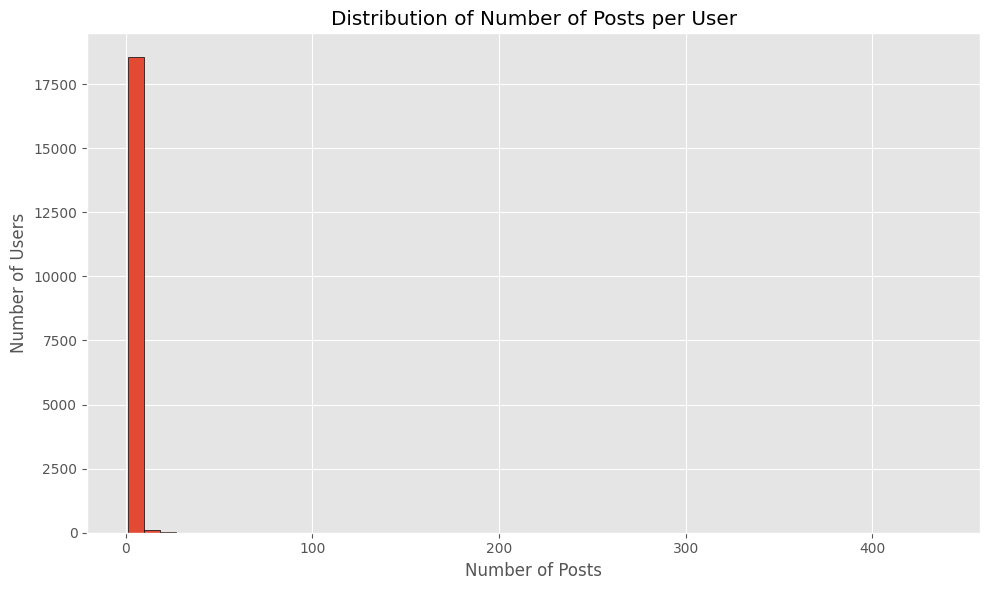

In [ ]:

#data
df = pd.read_csv("Mental health social forum cleaned.csv")

# Count number of posts per user
user_post_counts = df["User ID"].value_counts()

# Plot histogram of post distribution
plt.figure(figsize=(10,6))
plt.hist(user_post_counts, bins=50, edgecolor="black")
plt.title("Distribution of Number of Posts per User")
plt.xlabel("Number of Posts")
plt.ylabel("Number of Users")
plt.grid(True)
plt.tight_layout()
plt.show()


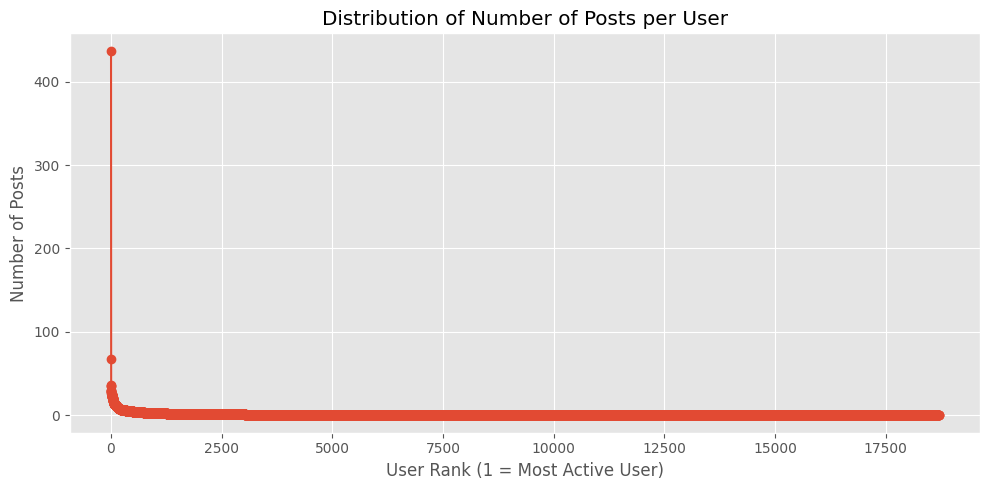

In [ ]:

df = pd.read_csv("Mental health social forum cleaned.csv")

# Count posts per user
user_post_counts = df["User ID"].value_counts().sort_values(ascending=False)

# Create a line plot of distribution
plt.figure(figsize=(10,5))
plt.plot(range(1, len(user_post_counts)+1), user_post_counts.values, marker='o')
plt.title("Distribution of Number of Posts per User")
plt.xlabel("User Rank (1 = Most Active User)")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

# Load your data
df = pd.read_csv("Mental health social forum cleaned.csv")

# Count words in Post Content
df["WordCount_Content"] = df["Post Content"].astype(str).apply(lambda x: len(x.split()))

# Count words in Post Title
df["WordCount_Title"] = df["Post Title"].astype(str).apply(lambda x: len(x.split()))

# Save to new CSV if needed
df.to_csv("Mental health social forum with wordcounts.csv", index=False)

print("✅ Word counts added as new columns")
print(df[["Post Title", "WordCount_Title", "Post Content", "WordCount_Content"]].head())


✅ Word counts added as new columns
                                          Post Title  WordCount_Title  \
0  Hi! Check out this post if you're not sure how...               12   
1                               I had a car accident                5   
2                                      Horrible week                2   
3                           New relationship anxiety                3   
4                       Persistent, constant anxiety                3   

                                        Post Content  WordCount_Content  
0  Hi there and welcome to the Anxiety section of...                281  
1  And it was entirely my own fault.  I tried cro...                254  
2  Hi everyone,\nI'm having a horrible week, so j...                 51  
3  Dear All\nJust need a connection to feel the s...                477  
4  Hi there,\njust reaching out to anyone who mig...                254  


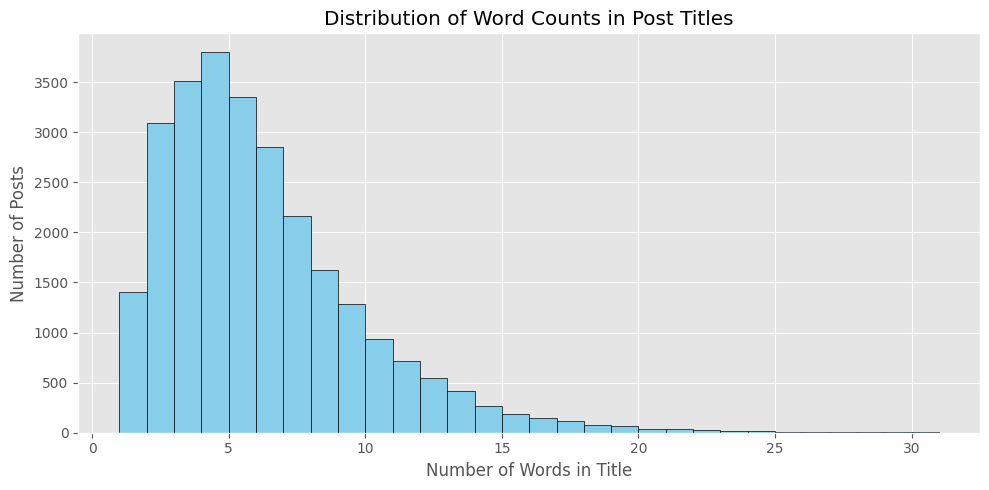

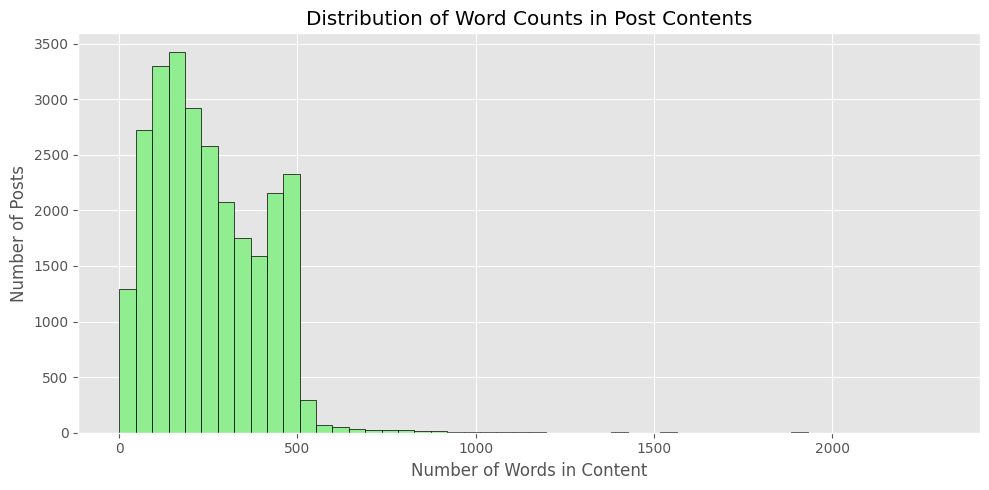

In [ ]:


# Load your data
df = pd.read_csv("Mental health social forum cleaned.csv")

# Count words in Post Content and Post Title
df["WordCount_Content"] = df["Post Content"].astype(str).apply(lambda x: len(x.split()))
df["WordCount_Title"] = df["Post Title"].astype(str).apply(lambda x: len(x.split()))

# --- Plot Word Count Distribution for Post Title ---
plt.figure(figsize=(10,5))
plt.hist(df["WordCount_Title"], bins=30, edgecolor="black", color="skyblue")
plt.title("Distribution of Word Counts in Post Titles")
plt.xlabel("Number of Words in Title")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Word Count Distribution for Post Content ---
plt.figure(figsize=(10,5))
plt.hist(df["WordCount_Content"], bins=50, edgecolor="black", color="lightgreen")
plt.title("Distribution of Word Counts in Post Contents")
plt.xlabel("Number of Words in Content")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import nbformat

input_file = "Data_Cleaning_and_EDA (2).ipynb"   # your current notebook name
output_file = "Data_Cleaning_and_EDA_Cleaned.ipynb"

with open(input_file, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Remove only widget metadata, keep outputs
if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

with open(output_file, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print("✅ Cleaned notebook saved as:", output_file)


FileNotFoundError: [Errno 2] No such file or directory: 'Data_Cleaning_and_EDA (2).ipynb'